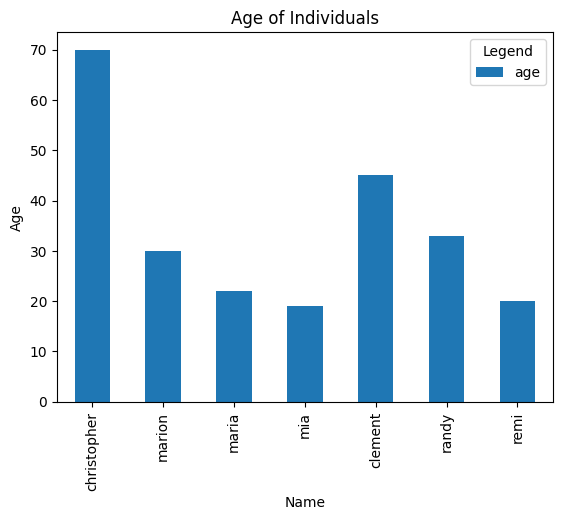

In [1]:
# Exercise 1: Pandas plot 1
import pandas as pd
import matplotlib.pyplot as plt

# Data
df = pd.DataFrame({
    'name': ['christopher','marion','maria','mia','clement','randy','remi'],
    'age': [70, 30, 22, 19, 45, 33, 20],
    'gender': ['M','F','F','F','M','M','M'],
    'state': ['california','dc','california','dc','california','new york','porto'],
    'num_children': [2,0,0,3,8,1,4],
    'num_pets': [5,1,0,5,2,2,3]
})

# Bar plot: age vs name
df.plot(
    x="name",
    y="age",
    kind="bar",
    title="Age of Individuals"
)

# Axis labels
plt.xlabel("Name")
plt.ylabel("Age")

plt.legend(title="Legend")

# Show plot
plt.show()

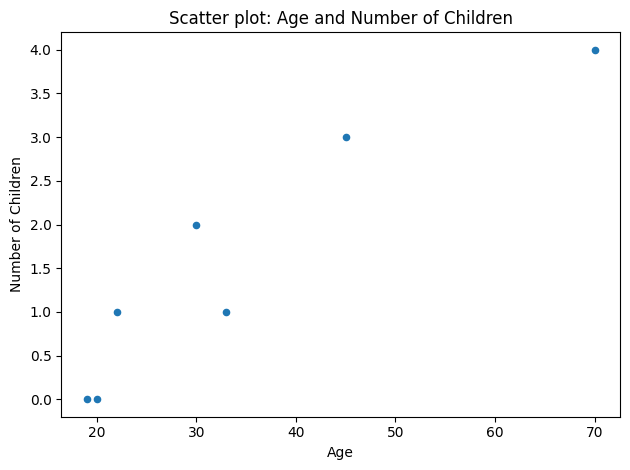

In [2]:
# Exercise 2: Pandas plot 2
df = pd.DataFrame({
    'name': ['christopher', 'marion', 'maria', 'mia', 'clement', 'randy', 'remi'],
    'age': [70, 30, 22, 19, 45, 33, 20],
    'gender': ['M', 'F', 'F', 'F', 'M', 'M', 'M'],
    'state': ['california', 'dc', 'california', 'dc', 'california', 'new york', 'porto'],
    'num_children': [4, 2, 1, 0, 3, 1, 0],
    'num_pets': [5, 1, 0, 2, 2, 2, 3]
})

ax = df.plot.scatter(
    x='age',
    y='num_children'
)
ax.set_title('Scatter plot: Age and Number of Children')
ax.set_xlabel('Age')
ax.set_ylabel('Number of Children')
plt.tight_layout()
plt.show()

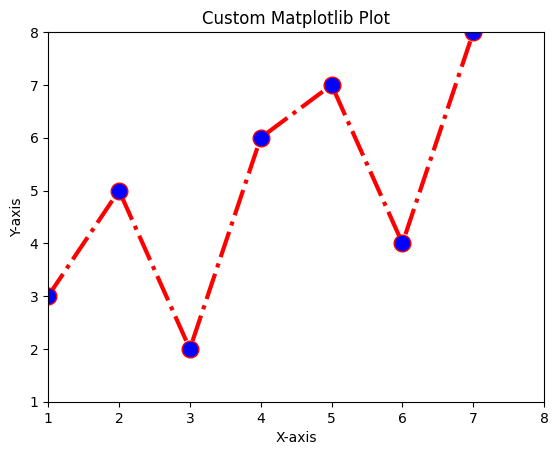

In [3]:
# Exercise 3: Matplotlib 1
import matplotlib.pyplot as plt

# Example data points (integer coordinates)
x = [1, 2, 3, 4, 5, 6, 7]
y = [3, 5, 2, 6, 7, 4, 8]

# Plot with red dashdot line and blue circles
plt.plot(x, y, color="red", linestyle="dashdot", linewidth=3, marker="o", 
         markerfacecolor="blue", markersize=12)

# Title and axis labels
plt.title("Custom Matplotlib Plot")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")

# Limit axes
plt.xlim(1, 8)
plt.ylim(1, 8)

# Show plot
plt.show()

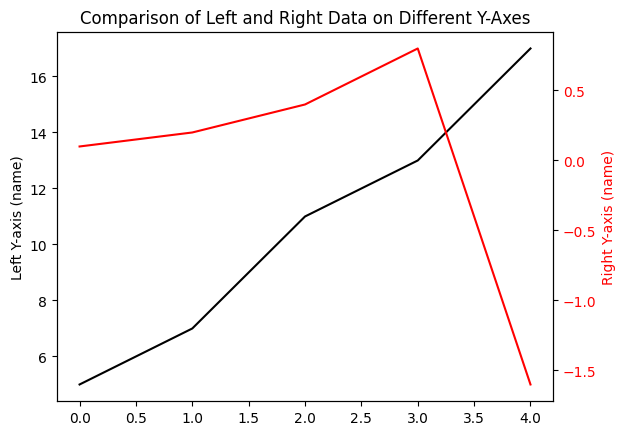

In [4]:
#Exercise 4
import matplotlib.pyplot as plt

left_data = [5, 7, 11, 13, 17]
right_data = [0.1, 0.2, 0.4, 0.8, -1.6]
x_axis = [0.0, 1.0, 2.0, 3.0, 4.0]

fig, ax1 = plt.subplots()

#Plot left data (black)
ax1.plot(x_axis, left_data, color='black', label='Left Data')
ax1.set_ylabel('Left Y-axis (name)', color='black')
ax1.tick_params(axis='y', labelcolor='black')

#Create right y-axis
ax2 = ax1.twinx()
ax2.plot(x_axis, right_data, color='red', label='Right Data')
ax2.set_ylabel('Right Y-axis (name)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('Comparison of Left and Right Data on Different Y-Axes')
plt.show()

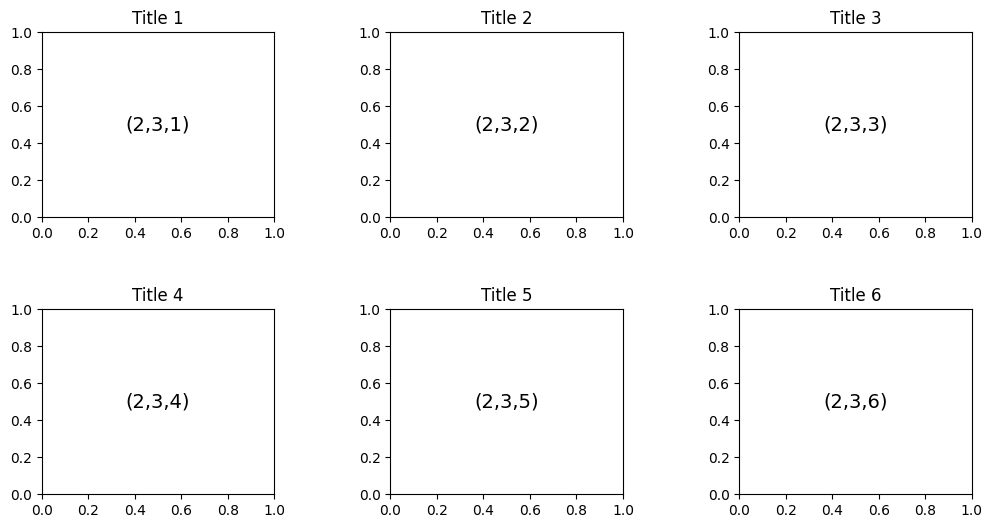

In [5]:
#Exercise 5: Matplotlib subplots

import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 3, figsize=(12, 6))
fig.subplots_adjust(hspace=0.5, wspace=0.5)
for i, ax in enumerate(axes.flat, start=1):
    ax.text(0.5, 0.5, f"(2,3,{i})", ha='center', va='center', fontsize=14)
    ax.set_title(f"Title {i}")
plt.show()
    